# 1. Leki 2019 - 2023

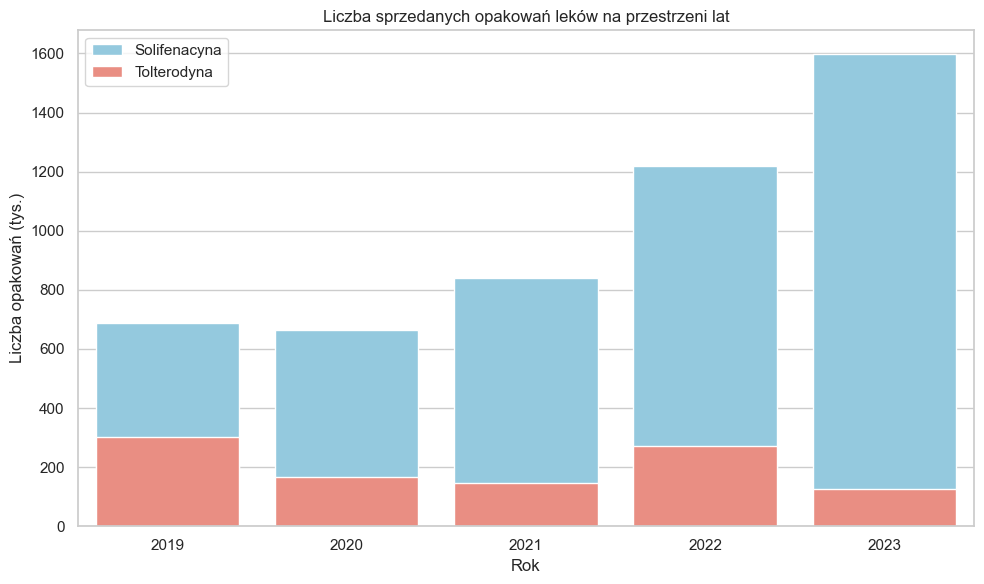

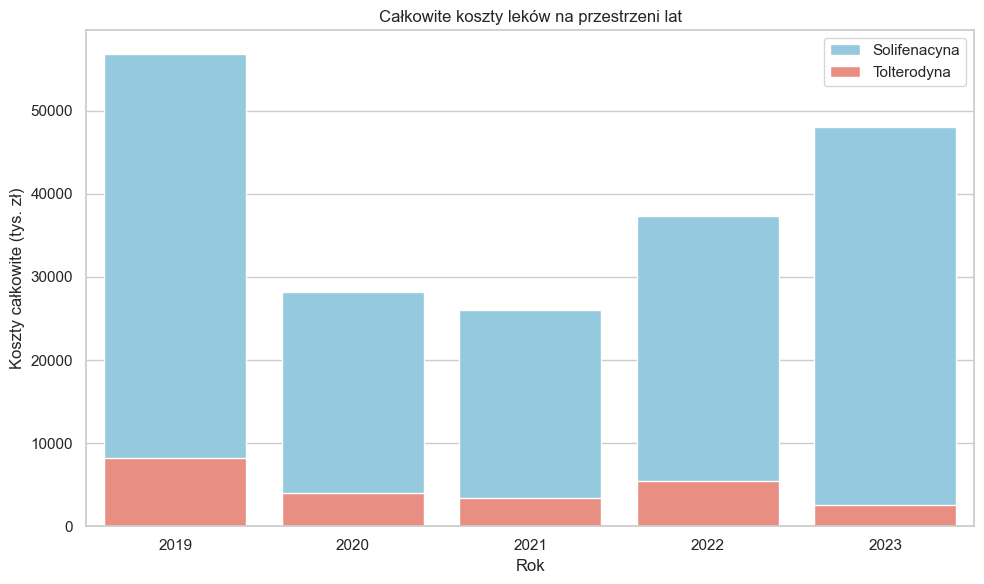

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie pliku Excel
file_path = "dane zgrupowane\\LEKI_2019-2023.xlsx"
df = pd.read_excel(file_path)

# Czyszczenie nazw kolumn
df.columns = df.columns.str.strip()

# Podział danych na Solifenacynę i Tolterodynę
solifenacyna = df[df['Substancja czynna'] == 'Solifenacyna']
tolterodyna = df[df['Substancja czynna'] == 'Tolterodyna']

# Agregacja danych po roku
df_sol_sum = solifenacyna.groupby("ROK")[['liczba opakowań (tys.)', 'Koszty  całkowite (tys. zł)']].sum().reset_index()
df_tol_sum = tolterodyna.groupby("ROK")[['liczba opakowań (tys.)', 'Koszty  całkowite (tys. zł)']].sum().reset_index()

# Łączenie danych do wspólnego DataFrame
df_combined = pd.merge(
    df_sol_sum, df_tol_sum, on="ROK", suffixes=("_Solifenacyna", "_Tolterodyna")
)

# Ustawienia wykresów Seaborn
sns.set_theme(style="whitegrid")

# Wykres 1: Liczba opakowań
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_combined,
    x="ROK",
    y="liczba opakowań (tys.)_Solifenacyna",
    color="skyblue",
    label="Solifenacyna"
)
sns.barplot(
    data=df_combined,
    x="ROK",
    y="liczba opakowań (tys.)_Tolterodyna",
    color="salmon",
    label="Tolterodyna"
)

# Tytuł i etykiety osi
plt.title("Liczba sprzedanych opakowań leków na przestrzeni lat")
plt.xlabel("Rok")
plt.ylabel("Liczba opakowań (tys.)")
plt.legend()
plt.tight_layout()
plt.show()

# Wykres 2: Całkowite koszty
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_combined,
    x="ROK",
    y="Koszty  całkowite (tys. zł)_Solifenacyna",
    color="skyblue",
    label="Solifenacyna"
)
sns.barplot(
    data=df_combined,
    x="ROK",
    y="Koszty  całkowite (tys. zł)_Tolterodyna",
    color="salmon",
    label="Tolterodyna"
)

# Tytuł i etykiety osi
plt.title("Całkowite koszty leków na przestrzeni lat")
plt.xlabel("Rok")
plt.ylabel("Koszty całkowite (tys. zł)")
plt.legend()
plt.tight_layout()
plt.show()


# 2. Chemioterapia 2019 - 2023

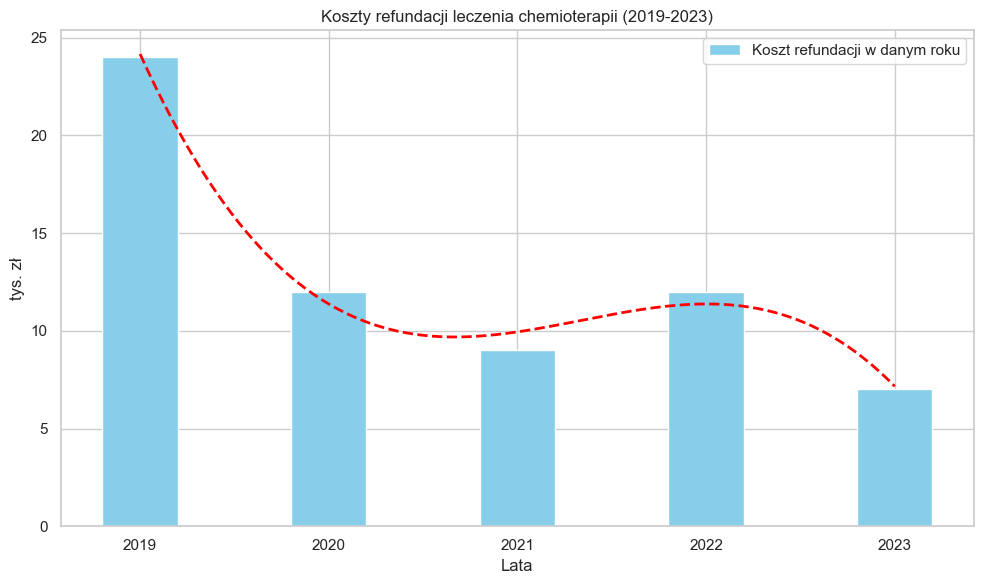

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Wczytanie pliku Excel
file_path = "dane zgrupowane\\CHEMIOTERAPIA_2019-2023.xlsx"
df = pd.read_excel(file_path)

# Czyszczenie nazw kolumn (usunięcie ewentualnych spacji)
df.columns = df.columns.str.strip()

# Funkcja do dopasowania wielomianu
def fit_polynomial(x, y, degree=3):
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)
    return polynomial

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 6))

# Dopasowanie wielomianu dla kosztów refundacji
refund_poly = fit_polynomial(df['rok realizacji'], df['koszt refundacji leczenia (tys. zł)'])
x_values = np.linspace(df['rok realizacji'].min(), df['rok realizacji'].max(), 200)
y_values = refund_poly(x_values)

# Wykres: Koszty refundacji leczenia chemioterapii
ax.bar(df['rok realizacji'], df['koszt refundacji leczenia (tys. zł)'], width=0.4, label='Koszt refundacji w danym roku', color='skyblue', align='center')
ax.plot(x_values, y_values, '--', color='red', linewidth=2)

# Dodanie etykiet i tytułu
ax.set_title('Koszty refundacji leczenia chemioterapii (2019-2023)')
ax.set_xlabel('Lata')
ax.set_ylabel('tys. zł')
ax.set_xticks([2019, 2020, 2021, 2022, 2023])
ax.legend()
ax.grid(True)

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()


# 3. Zabiegi 2019 - 2023

## a) zabiegi operacyjne ogółem

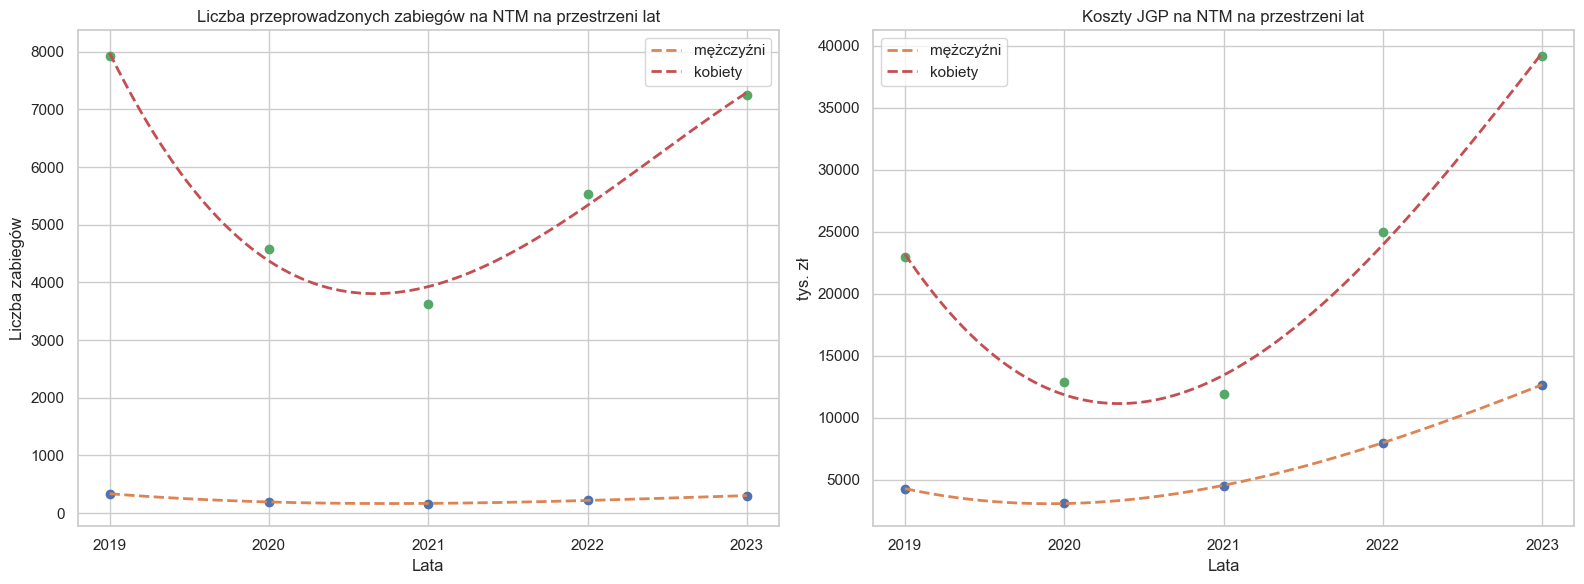

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Wczytanie pliku Excel
file_path = "dane zgrupowane\\zabiegi\\zabiegi_operacyjne_ogolem_2019-2023.xlsx"
df = pd.read_excel(file_path)

# Czyszczenie nazw kolumn
df.columns = df.columns.str.strip()

# Podział danych na Solifenacynę i Tolterodynę
men = df[df['płeć pacjenta'] == 'mężczyźni']
women = df[df['płeć pacjenta'] == 'kobiety']

# Funkcja do dopasowania wielomianu i generowania wartości predykcji
def fit_polynomial(x, y, degree=3):
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)
    return polynomial

# Tworzenie wykresów obok siebie
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 wiersz, 2 kolumny

# Wykres 1: Liczba zabiegów na przestrzeni lat
sol_poly = fit_polynomial(men['ROK'], men['liczba zabiegów'])
sol_x = np.linspace(men['ROK'].min(), men['ROK'].max(), 200)
sol_y = sol_poly(sol_x)

tol_poly = fit_polynomial(women['ROK'], women['liczba zabiegów'])
tol_x = np.linspace(women['ROK'].min(), women['ROK'].max(), 200)
tol_y = tol_poly(tol_x)

axes[0].plot(men['ROK'], men['liczba zabiegów'], 'o')
axes[0].plot(sol_x, sol_y, '--', label='mężczyźni', linewidth=2)
axes[0].plot(women['ROK'], women['liczba zabiegów'], 'o')
axes[0].plot(tol_x, tol_y, '--', label='kobiety', linewidth=2)
axes[0].set_title('Liczba przeprowadzonych zabiegów na NTM na przestrzeni lat')
axes[0].set_xlabel('Lata')
axes[0].set_ylabel('Liczba zabiegów')
axes[0].set_xticks([2019, 2020, 2021, 2022, 2023])
axes[0].legend()
axes[0].grid(True)

# Wykres 2: Koszty JGP na przestrzeni lat
sol_poly_costs = fit_polynomial(men['ROK'], men['koszt JGP (tys. zł)'])
sol_y_costs = sol_poly_costs(sol_x)

tol_poly_costs = fit_polynomial(women['ROK'], women['koszt JGP (tys. zł)'])
tol_y_costs = tol_poly_costs(tol_x)

axes[1].plot(men['ROK'], men['koszt JGP (tys. zł)'], 'o')
axes[1].plot(sol_x, sol_y_costs, '--', label='mężczyźni', linewidth=2)
axes[1].plot(women['ROK'], women['koszt JGP (tys. zł)'], 'o')
axes[1].plot(tol_x, tol_y_costs, '--', label='kobiety', linewidth=2)
axes[1].set_title('Koszty JGP na NTM na przestrzeni lat')
axes[1].set_xlabel('Lata')
axes[1].set_ylabel('tys. zł')
axes[1].set_xticks([2019, 2020, 2021, 2022, 2023])
axes[1].legend()
axes[1].grid(True)

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()


## b) procedury ICD 9

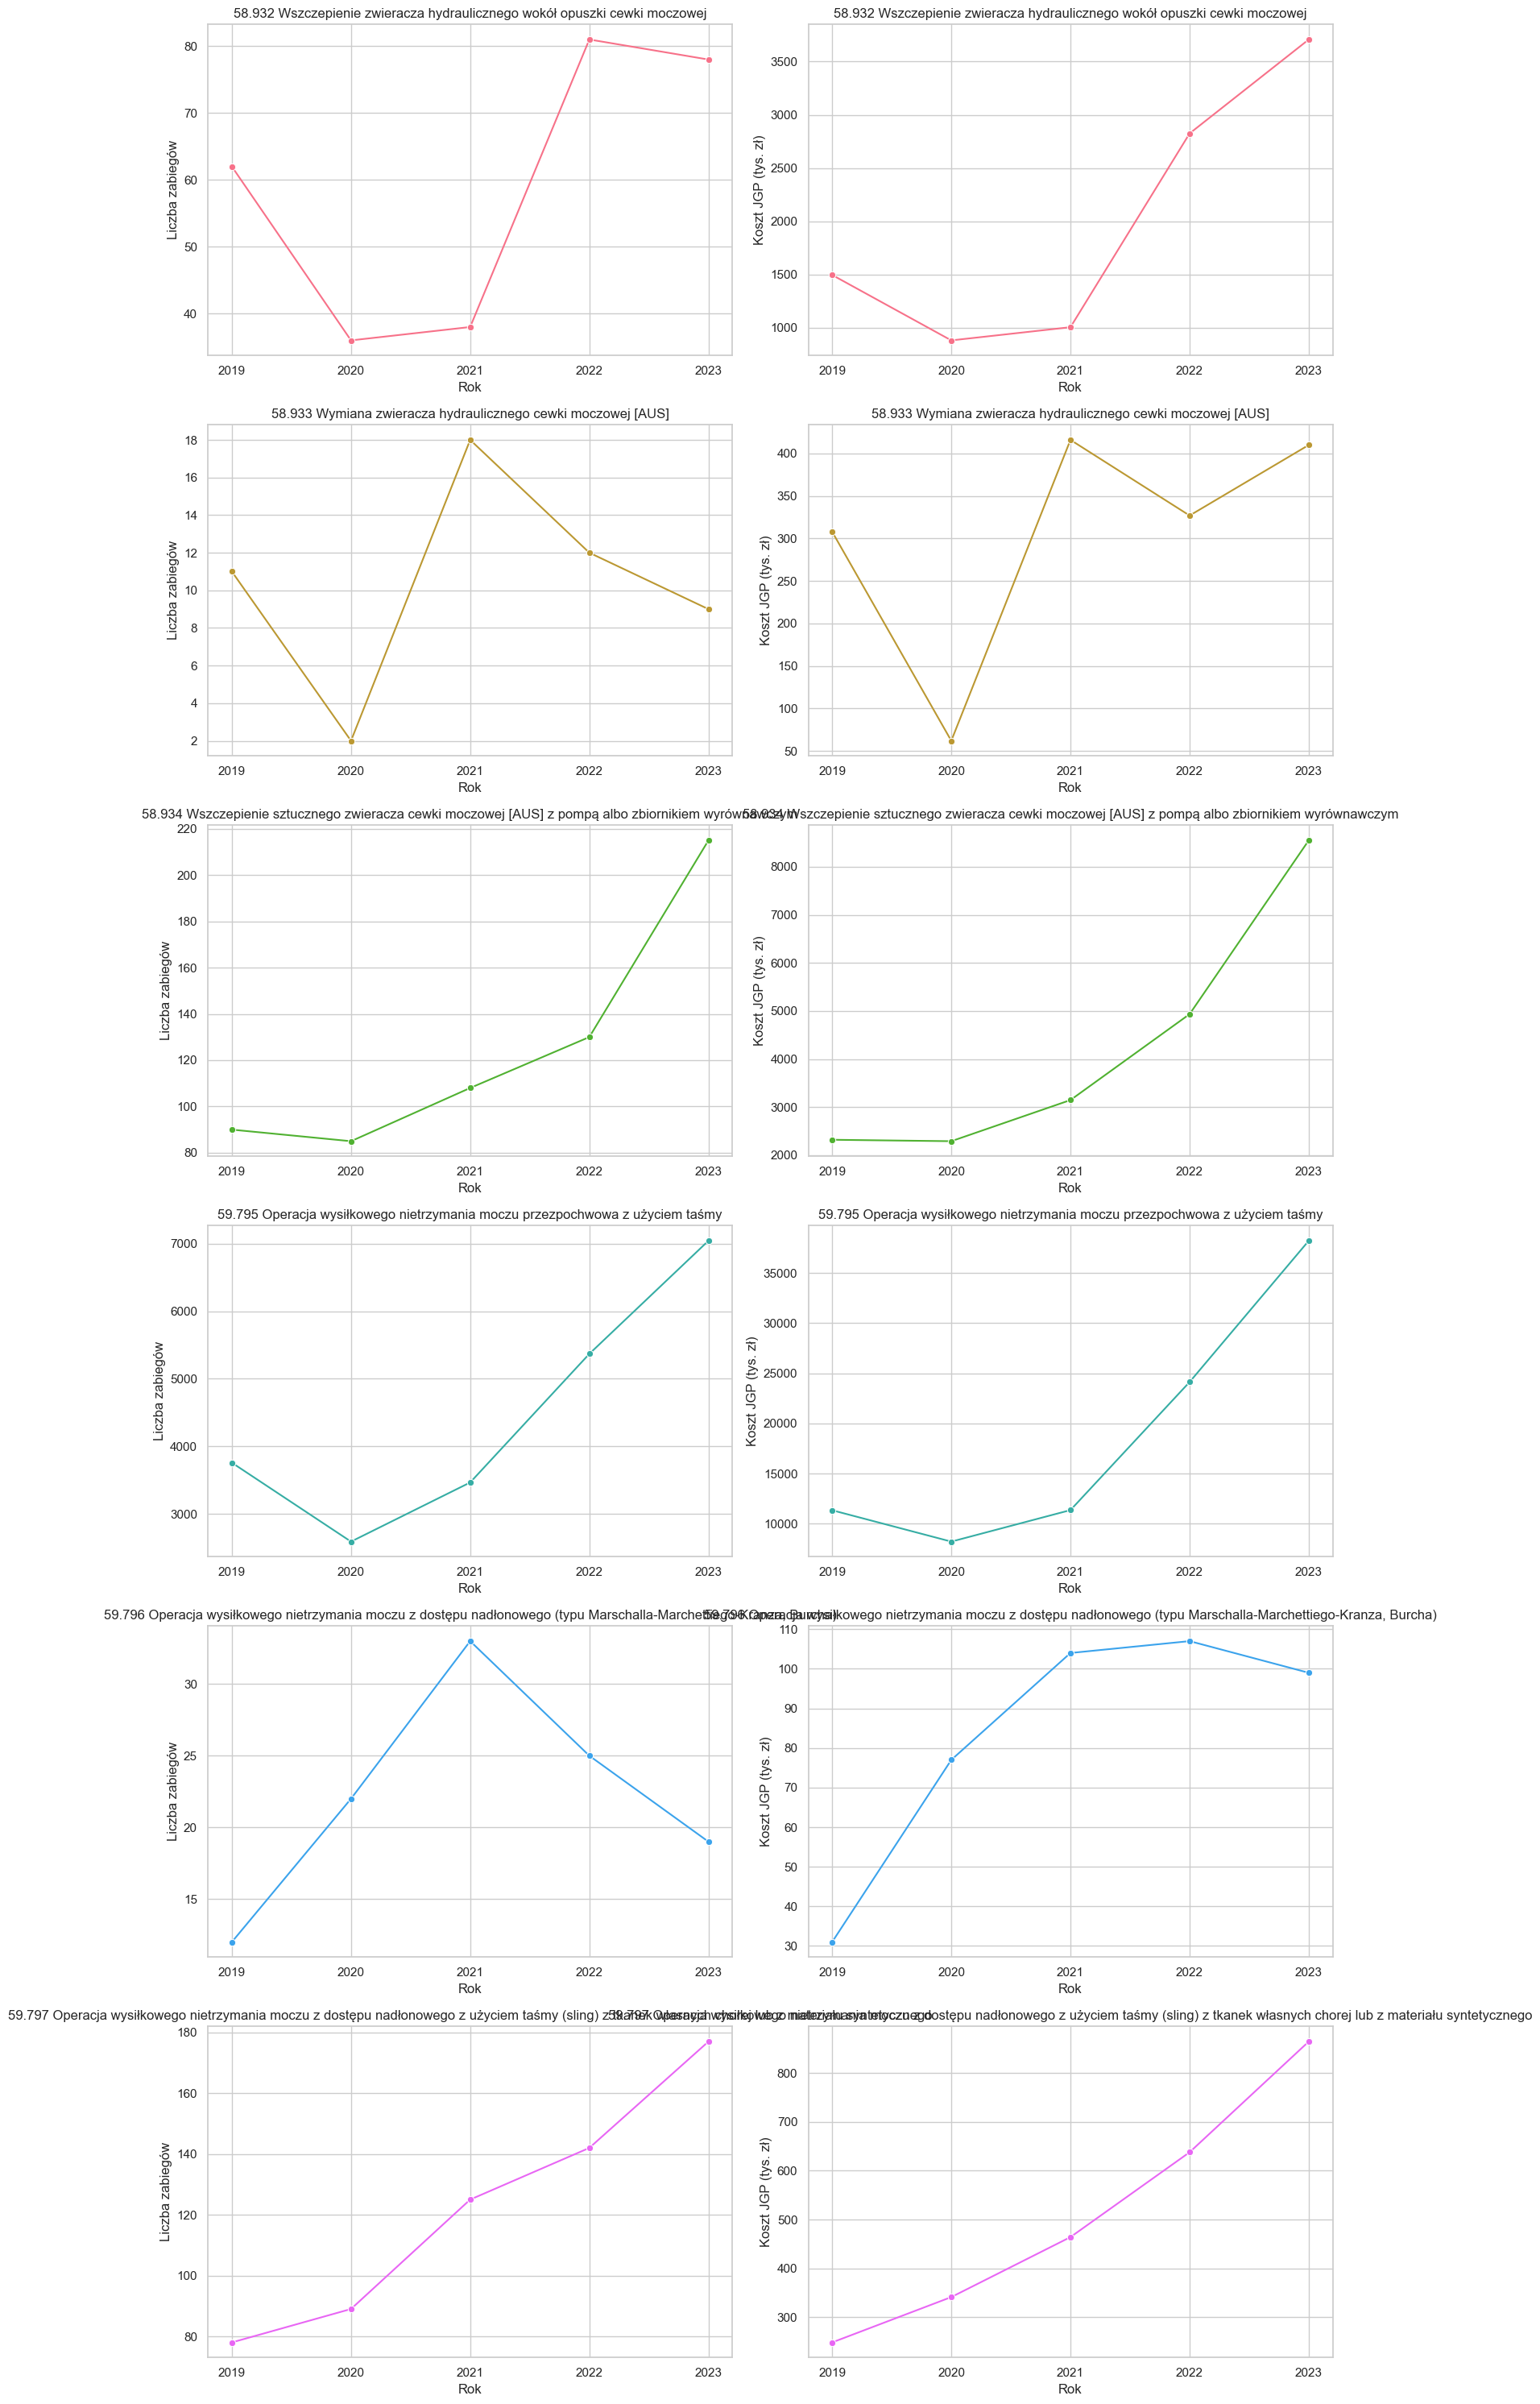

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel
file_path = 'dane zgrupowane\\zabiegi\\procedury_wg_ICD9_2019-2023.xlsx'
df = pd.read_excel(file_path)

# Ustawienia Seaborn
sns.set_theme(style="whitegrid")

# Unikalne procedury i lata
procedures = df['procedura ICD 9'].unique()
years = sorted(df['ROK'].unique())  # Pełne lata z danych

# Rozmiar siatki
n_cols = 2  # Para wykresów: liczba zabiegów i koszt JGP
n_rows = len(procedures)  # Liczba procedur = liczba wierszy

# Tworzenie siatki wykresów
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
colors = sns.color_palette("husl", len(procedures))  # Unikalne kolory dla każdej procedury

# Generowanie wykresów
for i, procedure in enumerate(procedures):
    data = df[df['procedura ICD 9'] == procedure]
    
    # Lewy wykres: liczba zabiegów
    sns.lineplot(
        ax=axes[i, 0],
        data=data,
        x='ROK',
        y='liczba zabiegów',
        marker='o',
        color=colors[i]
    )
    axes[i, 0].set_title(f"{procedure}")
    axes[i, 0].set_xlabel("Rok")
    axes[i, 0].set_ylabel("Liczba zabiegów")
    axes[i, 0].set_xticks(years)  # Ustawienie pełnych lat na osi X

    # Prawy wykres: koszt JGP
    sns.lineplot(
        ax=axes[i, 1],
        data=data,
        x='ROK',
        y='koszt JGP (tys. zł)',
        marker='o',
        color=colors[i]
    )
    axes[i, 1].set_title(f"{procedure}")
    axes[i, 1].set_xlabel("Rok")
    axes[i, 1].set_ylabel("Koszt JGP (tys. zł)")
    axes[i, 1].set_xticks(years)  # Ustawienie pełnych lat na osi X

# Dostosowanie layoutu
plt.tight_layout()
plt.show()


# 4. Zaopatrzenie 2019 - 2023

## a) Zaopatrzenie w wyroby medyczne

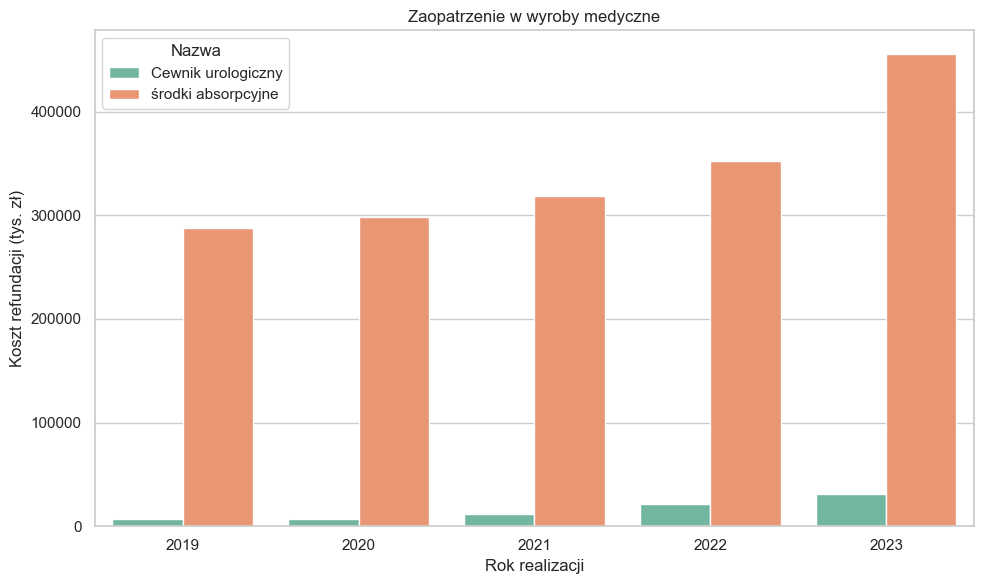

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel
file_path = 'dane zgrupowane\\zaopatrzenie\\Zaopatrzenie_w_wyroby_medyczne2019-2023.xlsx'
df = pd.read_excel(file_path)

# Ustawienia wykresu Seaborn
sns.set_theme(style="whitegrid")

# Tworzenie figury i osi (jeden wykres)
fig, ax = plt.subplots(figsize=(10, 6))

# 1. Wykres słupkowy
sns.barplot(
    ax=ax,
    data=df,
    x="Rok realizacji",
    y="Koszt refundacji (tys. zł)",
    hue="Nazwa",
    palette="Set2"
)

# Ustawienie tytułu i etykiet
ax.set_title("Zaopatrzenie w wyroby medyczne")
ax.set_xlabel("Rok realizacji")
ax.set_ylabel("Koszt refundacji (tys. zł)")

# Dostosowanie layoutu
plt.tight_layout()
plt.show()

## b) zaopatrzenie w wyroby medyczne - pacjenci z uprawnieniami dodatkowymi określonymi w art. 47 ust 1a i 1b ustawy o świadczeniach

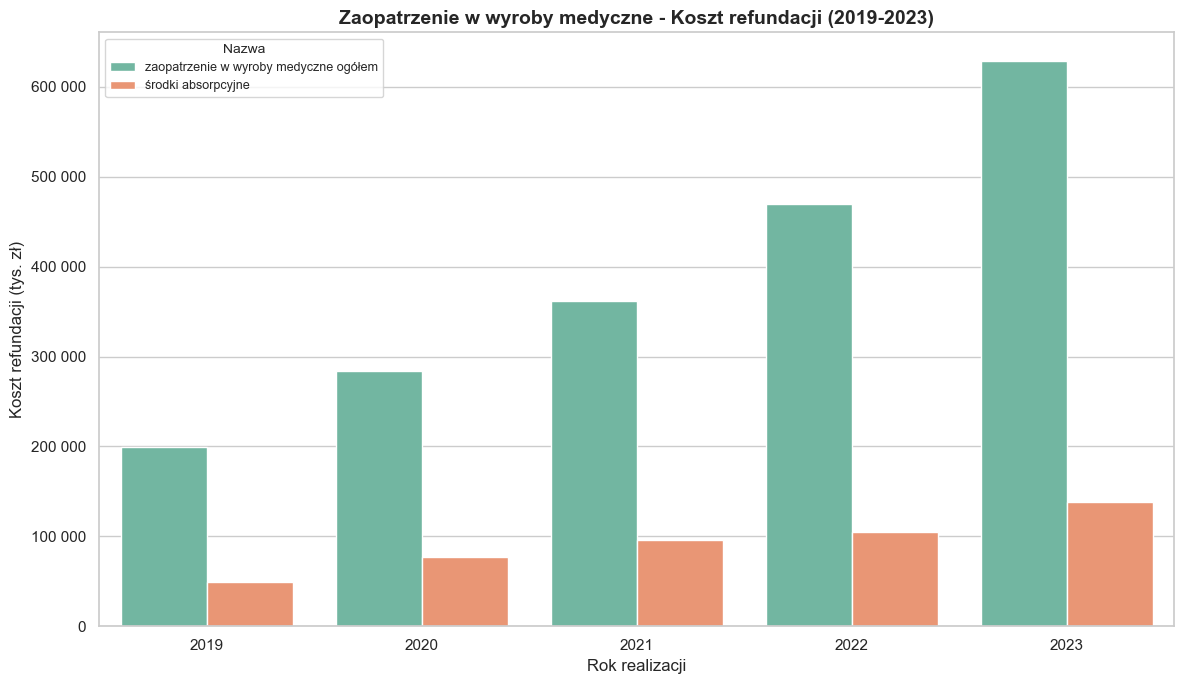

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel
file_path = 'dane zgrupowane\\zaopatrzenie\\zaopatrzenie_dla_wymagajacych_stalej_opieki2019-2023.xlsx'
df = pd.read_excel(file_path)

# Ustawienia wykresu Seaborn
sns.set_theme(style="whitegrid")

# Tworzenie figury i osi
fig, ax = plt.subplots(figsize=(12, 7))  # Zwiększony rozmiar wykresu dla lepszej czytelności

# 1. Wykres słupkowy
sns.barplot(
    ax=ax,
    data=df,
    x="Rok realizacji",
    y="Koszt refundacji  (tys. zł)",  # Zwróć uwagę na spację w nazwie kolumny
    hue="Nazwa",
    palette="Set2"
)

# Ustawienie tytułu i etykiet
ax.set_title("Zaopatrzenie w wyroby medyczne - Koszt refundacji (2019-2023)", fontsize=14, fontweight='bold')
ax.set_xlabel("Rok realizacji", fontsize=12)
ax.set_ylabel("Koszt refundacji (tys. zł)", fontsize=12)

# Formatowanie osi Y (dodanie separatora tysięcy)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))

# Dodanie legendy
ax.legend(title="Nazwa", title_fontsize='10', fontsize='9')

# Dostosowanie layoutu
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()


## c) zaopatrzenie w wyroby medyczne - pacjenci z uprawnieniami dodatkowymi wynikającymi z ustawy „Za życiem"

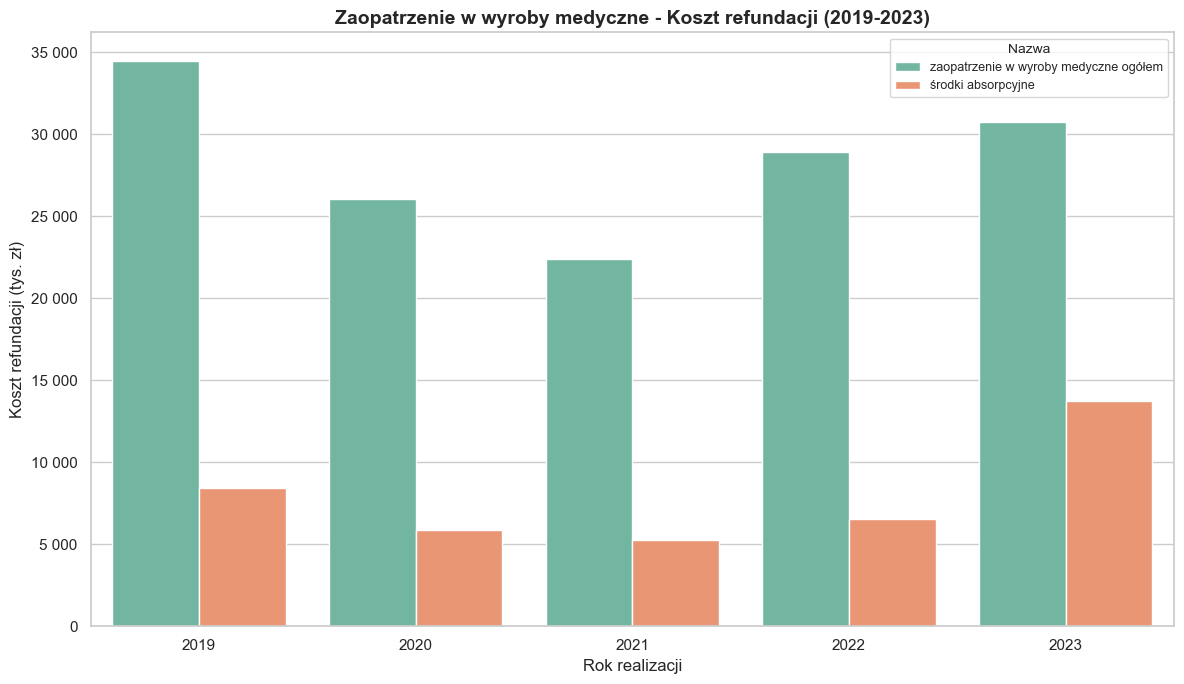

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel
file_path = 'dane zgrupowane\\zaopatrzenie\\zaopatrzenie_dla_objetych_ustawa_za_zyciem2019-2023.xlsx'
df = pd.read_excel(file_path)

# Ustawienia wykresu Seaborn
sns.set_theme(style="whitegrid")

# Tworzenie figury i osi
fig, ax = plt.subplots(figsize=(12, 7))  # Zwiększony rozmiar wykresu dla lepszej czytelności

# 1. Wykres słupkowy
sns.barplot(
    ax=ax,
    data=df,
    x="Rok realizacji",
    y="Koszt refundacji (tys. zł)",  # Dopasowane do nazwy kolumny
    hue="Nazwa",
    palette="Set2"
)

# Ustawienie tytułu i etykiet
ax.set_title("Zaopatrzenie w wyroby medyczne - Koszt refundacji (2019-2023)", fontsize=14, fontweight='bold')
ax.set_xlabel("Rok realizacji", fontsize=12)
ax.set_ylabel("Koszt refundacji (tys. zł)", fontsize=12)

# Formatowanie osi Y (dodanie separatora tysięcy)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))

# Dodanie legendy
ax.legend(title="Nazwa", title_fontsize='10', fontsize='9')

# Dostosowanie layoutu
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()


# 5. Rehabilitacja 2019 - 2023

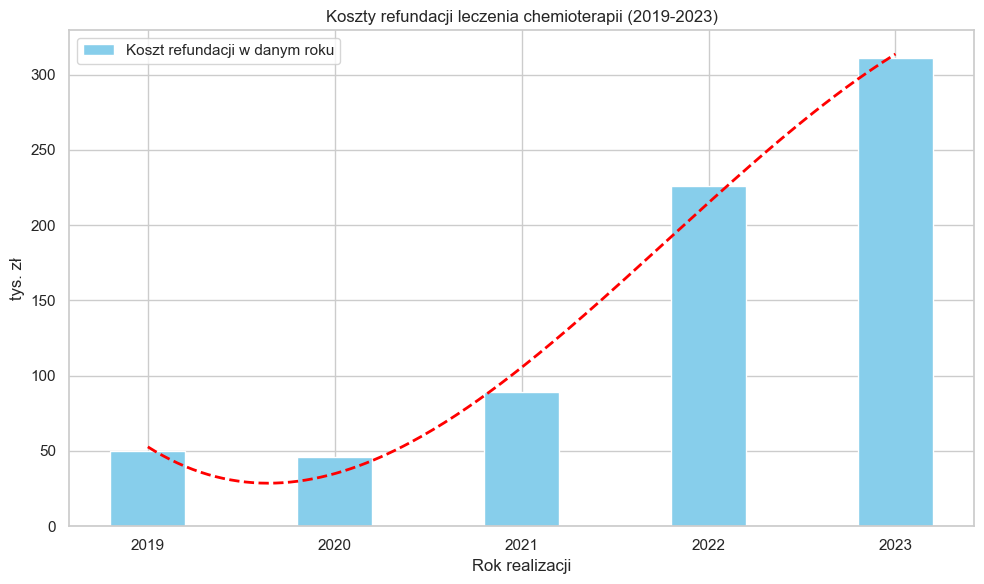

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Wczytanie pliku Excel
file_path = "dane zgrupowane\\REHABILITACJA2019-2023.xlsx"
df = pd.read_excel(file_path)

# Czyszczenie nazw kolumn (usunięcie ewentualnych spacji)
df.columns = df.columns.str.strip()

# Funkcja do dopasowania wielomianu
def fit_polynomial(x, y, degree=3):
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)
    return polynomial

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 6))

# Dopasowanie wielomianu dla kosztów refundacji
refund_poly = fit_polynomial(df['Rok realizacji'], df['Koszt refundacji (tys. zł)'])
x_values = np.linspace(df['Rok realizacji'].min(), df['Rok realizacji'].max(), 200)
y_values = refund_poly(x_values)

# Wykres: Koszty refundacji leczenia chemioterapii
ax.bar(df['Rok realizacji'], df['Koszt refundacji (tys. zł)'], width=0.4, label='Koszt refundacji w danym roku', color='skyblue', align='center')
ax.plot(x_values, y_values, '--', color='red', linewidth=2)

# Dodanie etykiet i tytułu
ax.set_title('Koszty refundacji leczenia chemioterapii (2019-2023)')
ax.set_xlabel('Rok realizacji')
ax.set_ylabel('tys. zł')
ax.set_xticks([2019, 2020, 2021, 2022, 2023])
ax.legend()
ax.grid(True)

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()


# 6. Opieka Ambulatoryjna 2019 - 2023

## a) porady ambulatoryjne sprawozdane z rozpoznaniem NTM

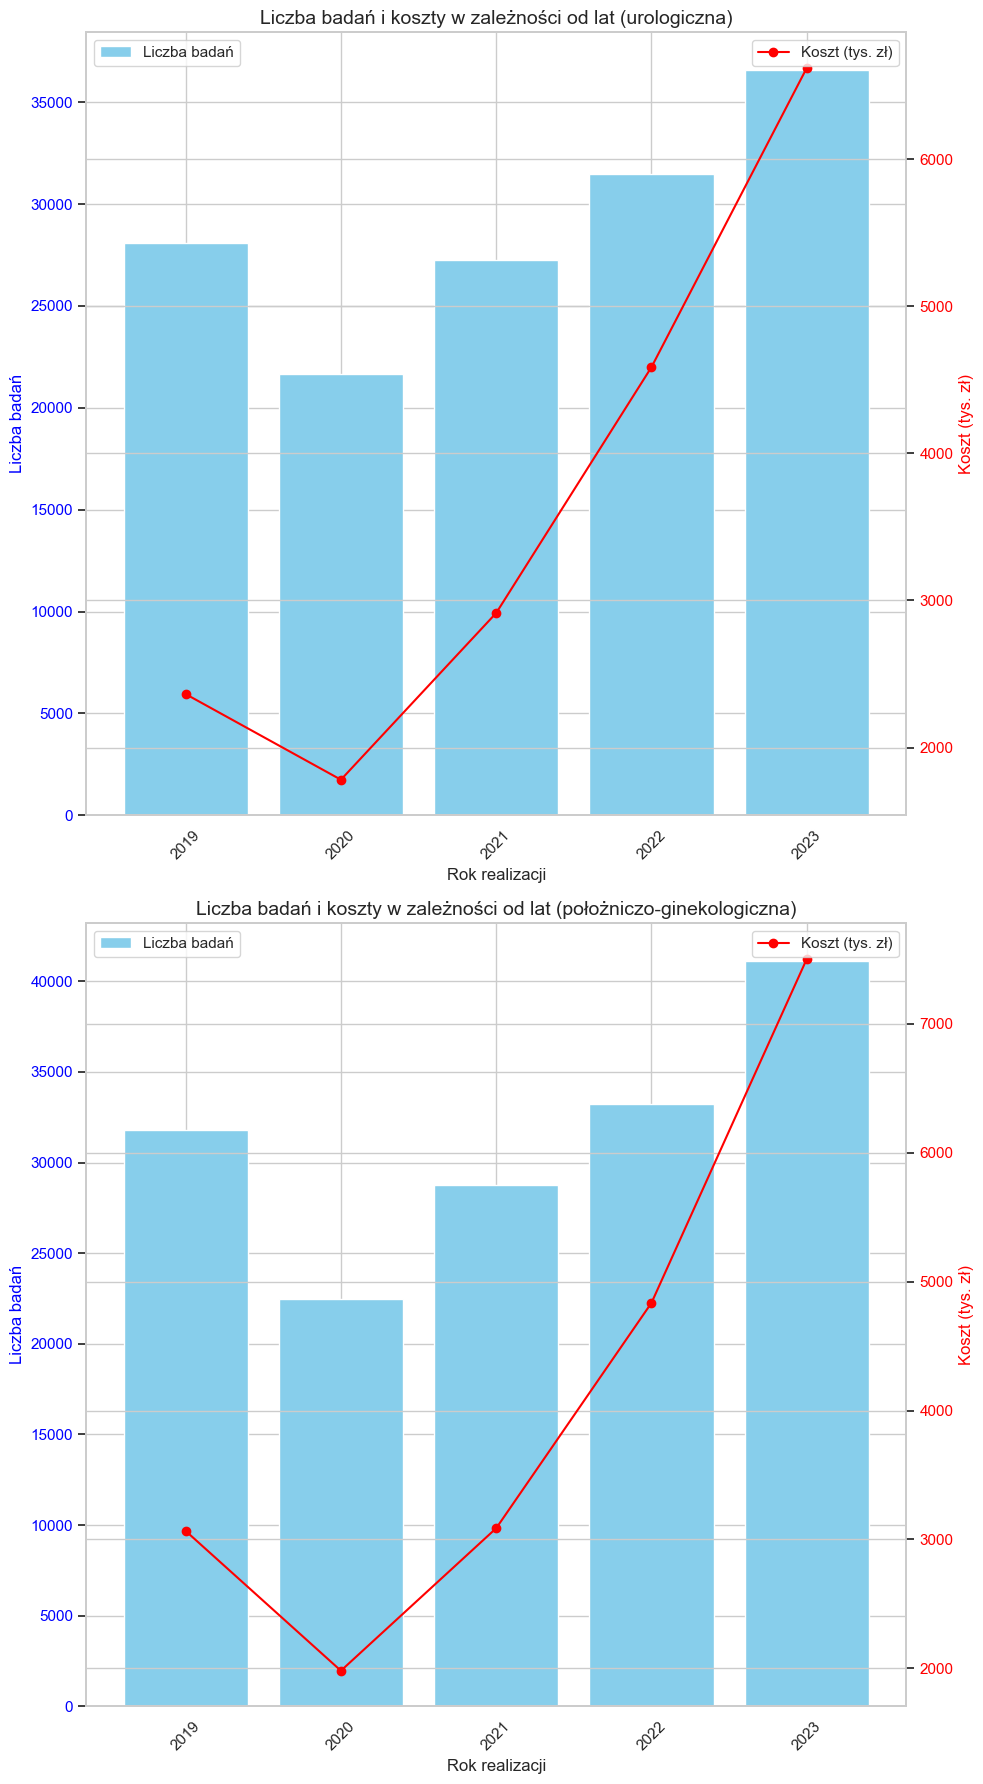

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel
file_path = "dane zgrupowane\\opieka ambulatoryjna\\porady_ambulatoryjne_sprawozdane_z_rozpoznaniem_NTM2019-2023.xlsx"
data = pd.read_excel(file_path)

# Filtrowanie danych dla poradni "ogółem", "urologiczna" i "położniczo-ginekologiczna"
selected_poradnie = ["urologiczna", "położniczo-ginekologiczna"]
filtered_data = data[data["poradnia"].isin(selected_poradnie)]

# Ustawienia siatki wykresów
fig, axes = plt.subplots(len(selected_poradnie), 1, figsize=(10, 18))

# Tworzenie wykresów dla każdej poradni z linią kosztów połączoną od najstarszego do najnowszego roku
for i, poradnia in enumerate(selected_poradnie):
    poradnia_data = filtered_data[filtered_data["poradnia"] == poradnia].sort_values(by="rok realizacji")
    
    ax1 = axes[i]
    ax1.bar(poradnia_data["rok realizacji"], poradnia_data["liczba"], color='skyblue', label="Liczba badań")
    ax1.set_xlabel("Rok realizacji", fontsize=12)
    ax1.set_ylabel("Liczba badań", color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(poradnia_data["rok realizacji"])
    ax1.set_xticklabels(poradnia_data["rok realizacji"].astype(int), rotation=45)
    
    ax2 = ax1.twinx()
    ax2.plot(poradnia_data["rok realizacji"], poradnia_data["koszt (tys. zł)"], color='red', marker='o', label="Koszt (tys. zł)", linestyle='-')
    ax2.set_ylabel("Koszt (tys. zł)", color='red', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='red')
    
    ax1.set_title(f"Liczba badań i koszty w zależności od lat ({poradnia})", fontsize=14)
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()




## b) badanie urodynamiczne* sprawozdane z rozpoznaniem NTM

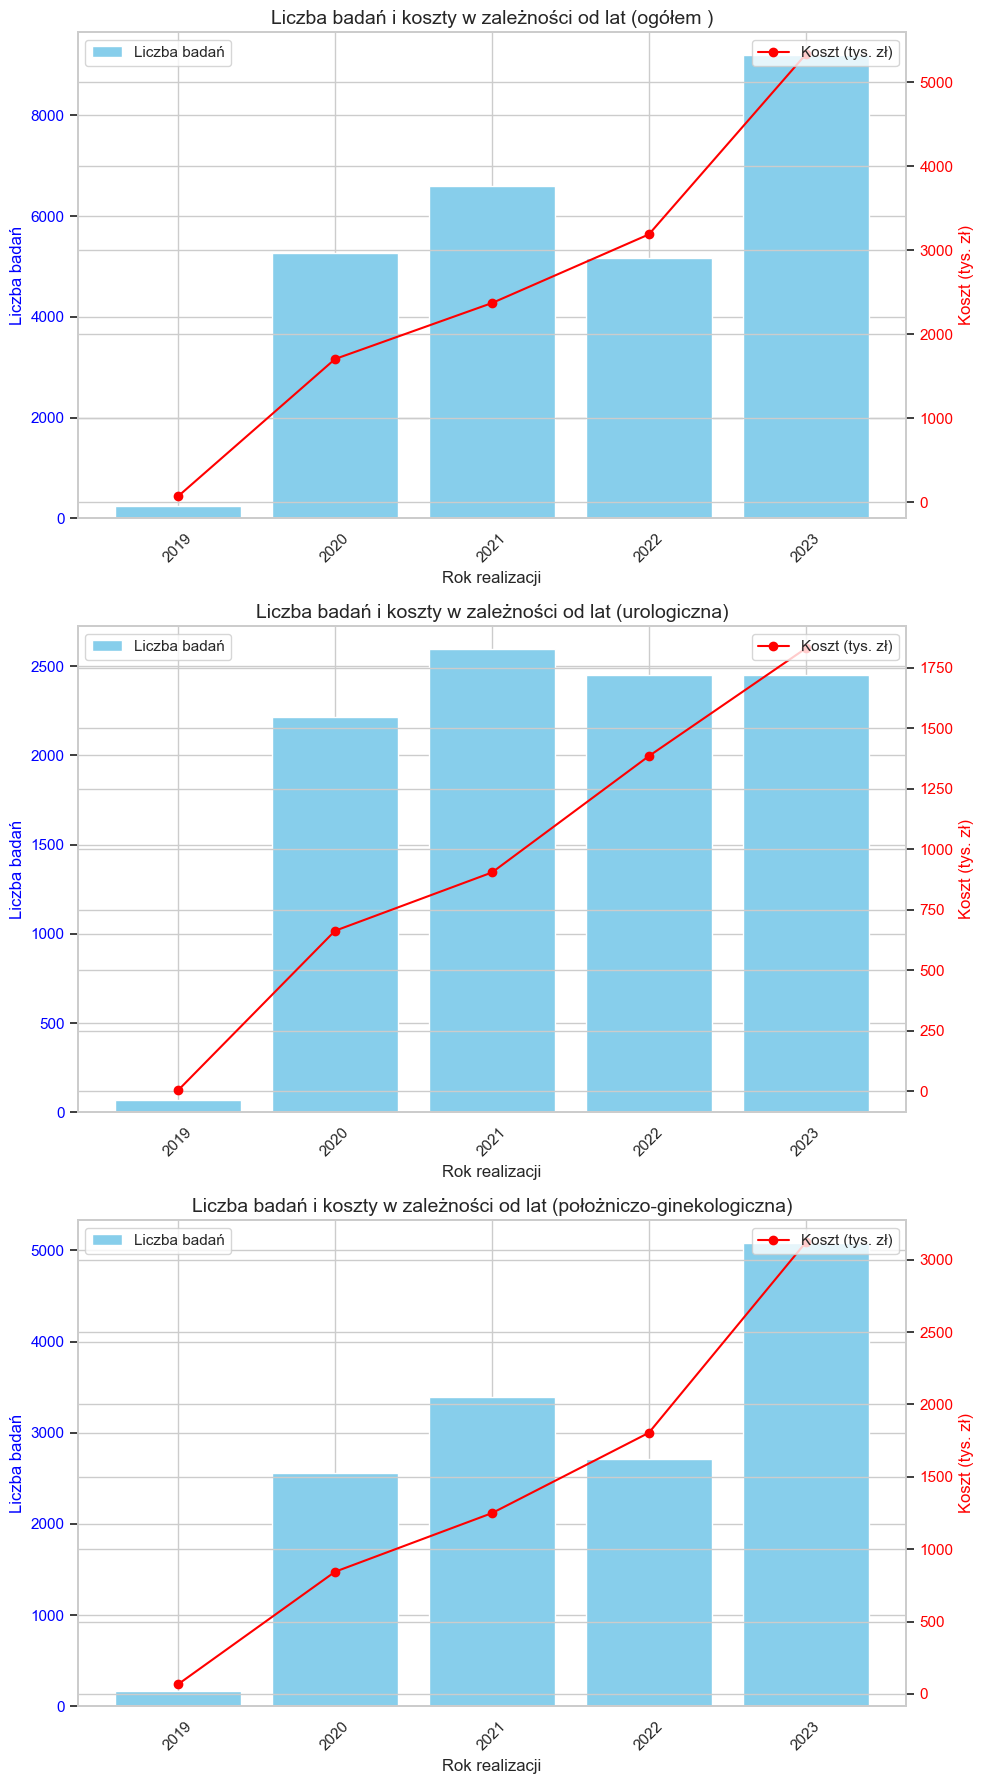

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel
file_path = "dane zgrupowane\\opieka ambulatoryjna\\badanie_urodynamiczne_sprawozdane_z_rozpoznaniem_NTM2020-2023.xlsx"
data = pd.read_excel(file_path)

# Filtrowanie danych dla poradni "ogółem", "urologiczna" i "położniczo-ginekologiczna"
selected_poradnie = ["ogółem ", "urologiczna", "położniczo-ginekologiczna"]
filtered_data = data[data["poradnia"].isin(selected_poradnie)]

# Ustawienia siatki wykresów
fig, axes = plt.subplots(len(selected_poradnie), 1, figsize=(10, 18))

# Tworzenie wykresów dla każdej poradni z linią kosztów połączoną od najstarszego do najnowszego roku
for i, poradnia in enumerate(selected_poradnie):
    poradnia_data = filtered_data[filtered_data["poradnia"] == poradnia].sort_values(by="rok realizacji")
    
    ax1 = axes[i]
    ax1.bar(poradnia_data["rok realizacji"], poradnia_data["liczba"], color='skyblue', label="Liczba badań")
    ax1.set_xlabel("Rok realizacji", fontsize=12)
    ax1.set_ylabel("Liczba badań", color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(poradnia_data["rok realizacji"])
    ax1.set_xticklabels(poradnia_data["rok realizacji"].astype(int), rotation=45)
    
    ax2 = ax1.twinx()
    ax2.plot(poradnia_data["rok realizacji"], poradnia_data["koszt (tys. zł)"], color='red', marker='o', label="Koszt (tys. zł)", linestyle='-')
    ax2.set_ylabel("Koszt (tys. zł)", color='red', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='red')
    
    ax1.set_title(f"Liczba badań i koszty w zależności od lat ({poradnia})", fontsize=14)
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()




# 7. Bad. urodynamiczne - podmioty 2020 - 2023

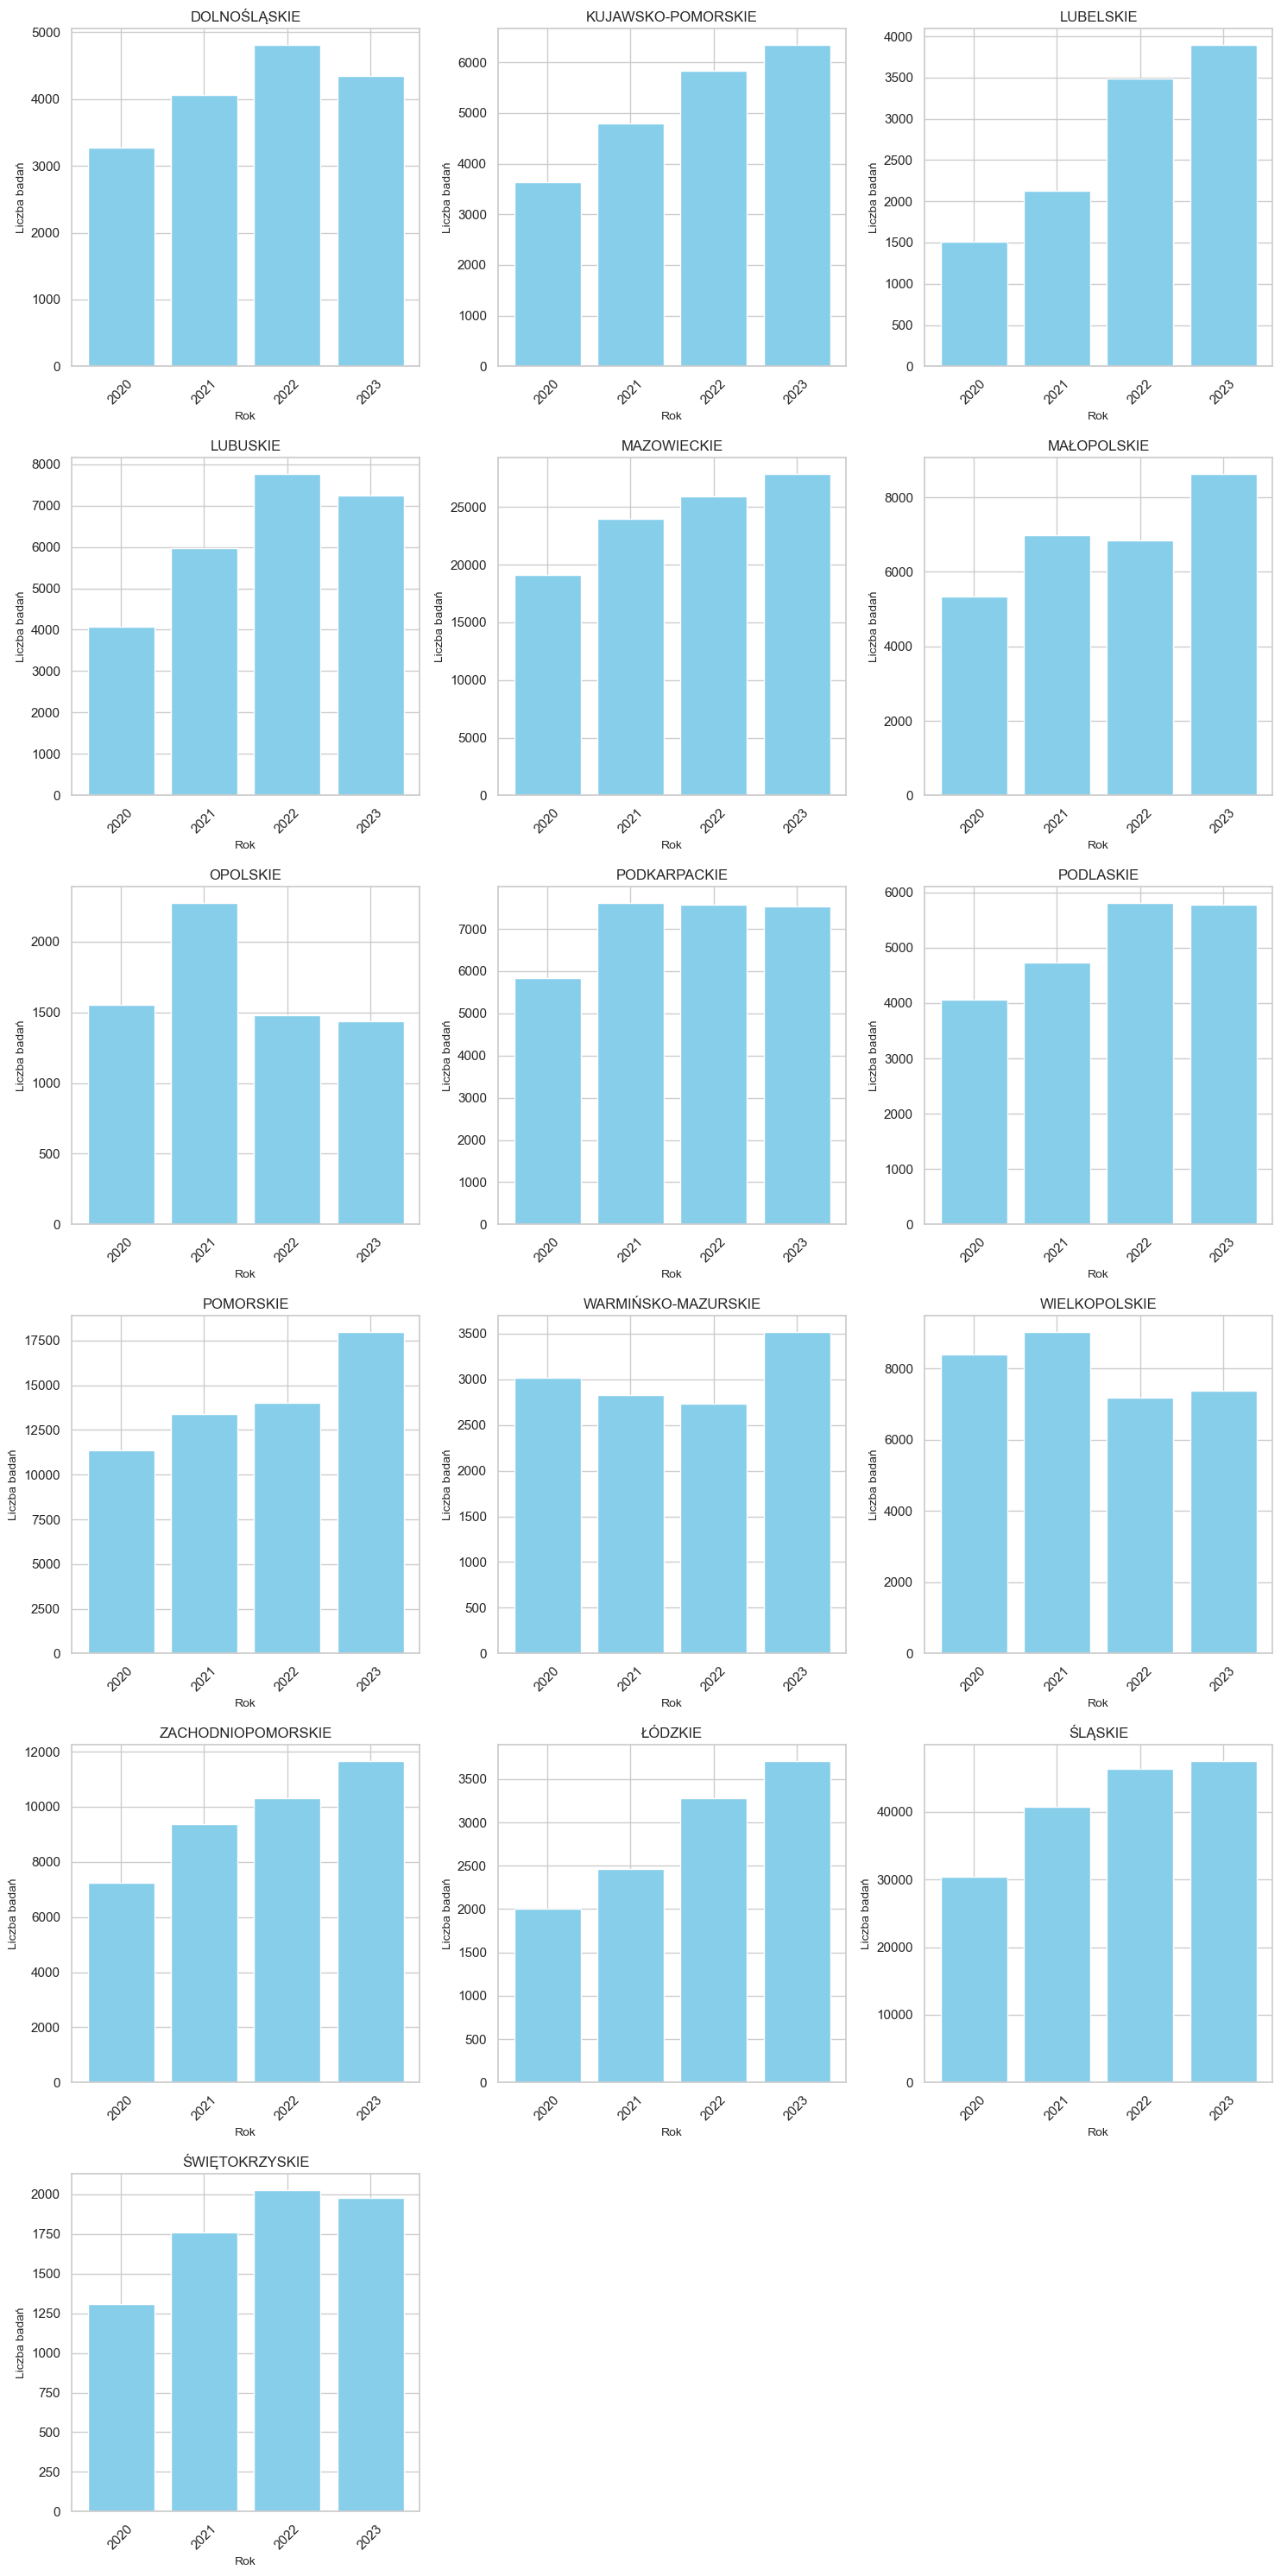

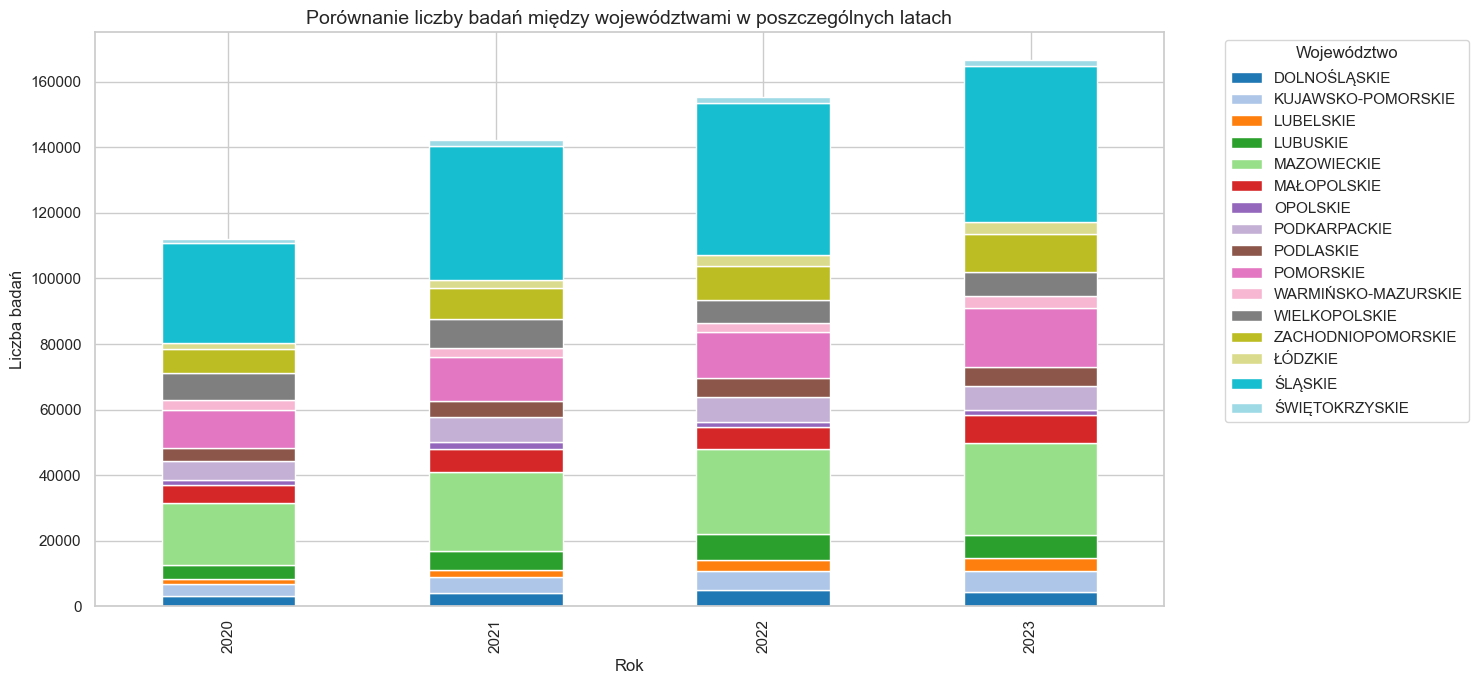

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel (zakładamy, że plik nazywa się "dane.xlsx" i jest w bieżącym katalogu)
plik_excel = "dane zgrupowane\\BADANIA_URODYNAMICZNE-PODMIOTY2020-2023.xlsx"
data = pd.read_excel(plik_excel)

# Filtrowanie danych: pomijanie określonych województw
data = data[~data['WOJEWÓDZTWO'].isin(['Nazwa OW NFZ', 'name_OW(IRKC)'])]

# Grupowanie danych: suma liczby badań dla każdego województwa w odniesieniu do lat
grouped_data = data.groupby(["WOJEWÓDZTWO", "ROK"])['LICZBA WYKONANYCH BADAŃ'].sum().reset_index()

# Lista unikalnych województw
wojewodztwa = grouped_data['WOJEWÓDZTWO'].unique()

# Ustawienia siatki wykresów
num_wojewodztwa = len(wojewodztwa)
cols = 3  # Liczba kolumn w siatce
rows = (num_wojewodztwa + cols - 1) // cols  # Wyliczenie liczby wierszy

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Tworzenie wykresów w siatce
for i, woj in enumerate(wojewodztwa):
    woj_data = grouped_data[grouped_data['WOJEWÓDZTWO'] == woj]
    axes[i].bar(woj_data['ROK'], woj_data['LICZBA WYKONANYCH BADAŃ'], color='skyblue')
    axes[i].set_title(f"{woj}", fontsize=12)
    axes[i].set_xlabel("Rok", fontsize=10)
    axes[i].set_ylabel("Liczba badań", fontsize=10)
    axes[i].set_xticks(woj_data['ROK'])  # Ustawienia etykiet na osiach X jako liczby całkowite
    axes[i].tick_params(axis='x', rotation=45)

# Usunięcie pustych wykresów, jeśli liczba województw nie pokrywa siatki
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Dodatkowa siatka porównawcza: liczba badań między województwami w danym roku
comparison_data = grouped_data.groupby(["ROK", "WOJEWÓDZTWO"])['LICZBA WYKONANYCH BADAŃ'].sum().unstack()

comparison_rows, comparison_cols = comparison_data.shape
fig2, ax2 = plt.subplots(figsize=(15, 7))
comparison_data.plot(kind='bar', stacked=True, ax=ax2, colormap='tab20')
ax2.set_title("Porównanie liczby badań między województwami w poszczególnych latach", fontsize=14)
ax2.set_xlabel("Rok", fontsize=12)
ax2.set_ylabel("Liczba badań", fontsize=12)
ax2.legend(title="Województwo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 8. Neuromodulacja 2022 - 2023
Danych z 2 lat nie ma nawet co porównywać

# Notatki
#### NTM (wszystkie problemy w tym Nerwica pęcherza moczowego)
#### Nerwica pęcherza moczowego jest spowodowana bezpośrednio stresem a on może już być spowodowany przez czynniki kulurowo-polityczne?
#### Nerwica pęcherza moczowego: leczenie jest po przez porady psychologiczne, unikanie stresu, medytacje itp.
#### NTM u kobiet jest dużo częstrze przez porody (zdecydowana większość przypadków)
### Zagwostki
#### Jak wydzielić Nerwica pęcherza moczowego??? (liczba porad - badania) Jeśli ktoś przychodzi po poradę i nie ma rozpoznanej przyczyny biologicznej to może być podłoże psychiczne.

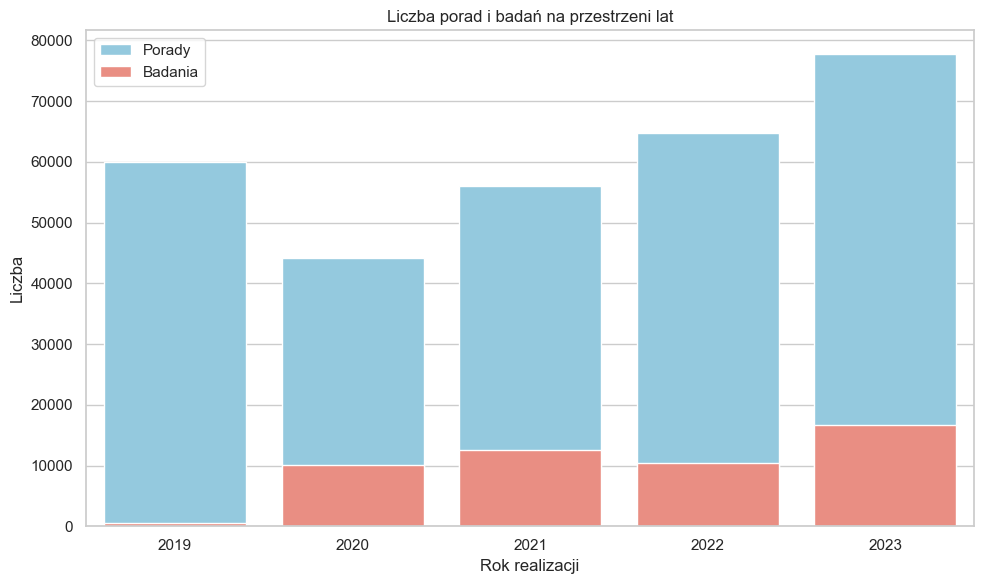

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel
file_path_porady = 'dane zgrupowane\\opieka ambulatoryjna\\porady_ambulatoryjne_sprawozdane_z_rozpoznaniem_NTM2019-2023.xlsx'
df_porady = pd.read_excel(file_path_porady)

file_path_badania = 'dane zgrupowane\\opieka ambulatoryjna\\badanie_urodynamiczne_sprawozdane_z_rozpoznaniem_NTM2020-2023.xlsx'
df_badania = pd.read_excel(file_path_badania)

# Agregacja danych po roku
df_porady_sum = df_porady.groupby("rok realizacji")["liczba"].sum().reset_index()
df_badania_sum = df_badania.groupby("rok realizacji")["liczba"].sum().reset_index()

# Połączenie danych
df_combined = pd.merge(df_porady_sum, df_badania_sum, on="rok realizacji", suffixes=('_porady', '_badania'))

# Ustawienia wykresu Seaborn
sns.set_theme(style="whitegrid")

# Tworzenie figury i osi
plt.figure(figsize=(10, 6))

# Wykres porównujący liczbę porad i liczbę badań w danym roku
sns.barplot(
    data=df_combined,
    x="rok realizacji",
    y="liczba_porady",
    color="skyblue",  # Kolor dla liczby porad
    label="Porady"
)
sns.barplot(
    data=df_combined,
    x="rok realizacji",
    y="liczba_badania",
    color="salmon",  # Kolor dla liczby badań
    label="Badania"
)

# Tytuł i etykiety osi
plt.title("Liczba porad i badań na przestrzeni lat")
plt.xlabel("Rok realizacji")
plt.ylabel("Liczba")

# Dodanie legendy
plt.legend()

# Dostosowanie layoutu
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()


# NTM a frekwencja wyborcza

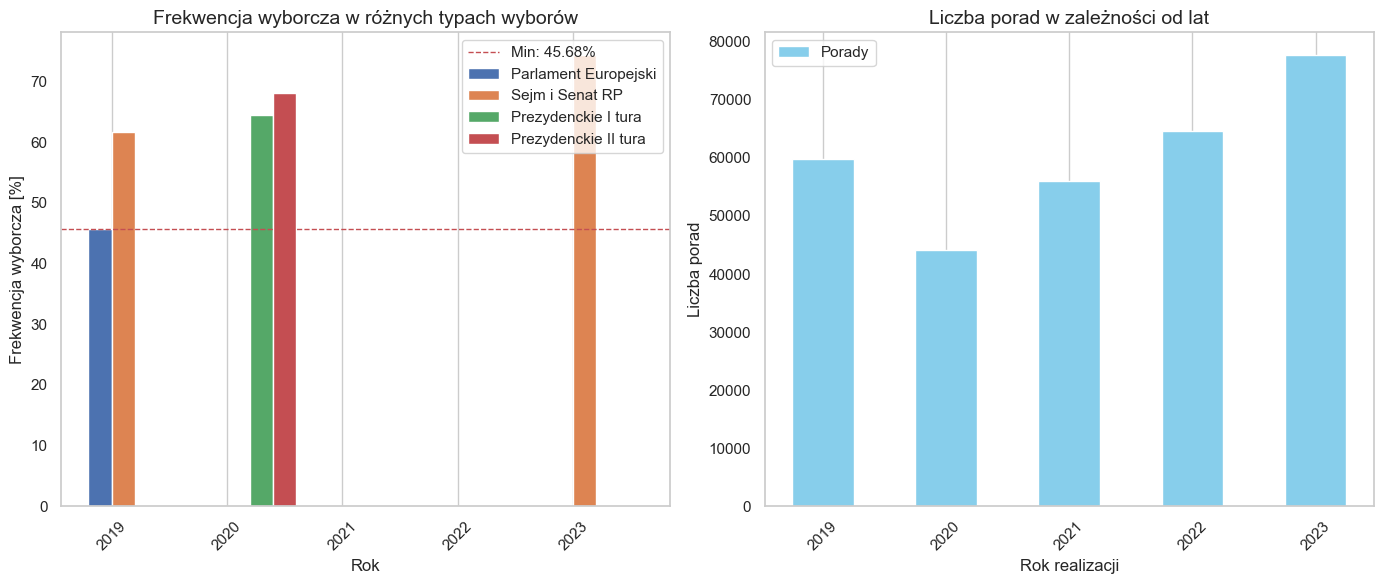

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dane frekwencji wyborczej
lata = [2019, 2020, 2021, 2022, 2023]
wybory = {
    "Parlament Europejski": [45.68, None, None, None, None],
    "Sejm i Senat RP": [61.74, None, None, None, 74.38],
    "Prezydenckie I tura": [None, 64.51, None, None, None],
    "Prezydenckie II tura": [None, 68.18, None, None, None]
}

# Przygotowanie danych do wykresu
x = np.arange(len(lata))  # Indeksy dla osi X
width = 0.2  # Szerokość słupków

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pierwszy wykres - frekwencja wyborcza
ax1 = axes[0]
all_values = [f for frekwencja in wybory.values() for f in frekwencja if f is not None]
min_value = min(all_values) if all_values else 0

for i, (typ, frekwencja) in enumerate(wybory.items()):
    values = [f if f is not None else 0 for f in frekwencja]
    ax1.bar(x + i * width, values, width=width, label=typ)

ax1.axhline(y=min_value, color='r', linestyle='--', linewidth=1, label=f'Min: {min_value:.2f}%')
ax1.set_xlabel("Rok", fontsize=12)
ax1.set_ylabel("Frekwencja wyborcza [%]", fontsize=12)
ax1.set_title("Frekwencja wyborcza w różnych typach wyborów", fontsize=14)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(lata, rotation=45)
ax1.legend()
ax1.grid(axis='y')

# Drugi wykres - liczba porad
file_path = "dane zgrupowane/opieka ambulatoryjna/porady_ambulatoryjne_sprawozdane_z_rozpoznaniem_NTM2019-2023.xlsx"
data = pd.read_excel(file_path)

# Agregacja danych po roku
df_porady_sum = data.groupby("rok realizacji")["liczba"].sum().reset_index()

lata_porad = sorted(df_porady_sum["rok realizacji"].unique())
x_porad = np.arange(len(lata_porad))
liczba_porad = df_porady_sum["liczba"].tolist()

ax2 = axes[1]
ax2.bar(x_porad, liczba_porad, width=0.5, color='skyblue', label="Porady")

ax2.set_xlabel("Rok realizacji", fontsize=12)
ax2.set_ylabel("Liczba porad", fontsize=12)
ax2.set_title("Liczba porad w zależności od lat", fontsize=14)
ax2.set_xticks(x_porad)
ax2.set_xticklabels(lata_porad, rotation=45)
ax2.legend()
ax2.grid(axis='y')

plt.tight_layout()
plt.show()


# NTM a poparcie partii politycznych
źródło: https://pl.wikipedia.org/wiki/Wybory_w_Polsce


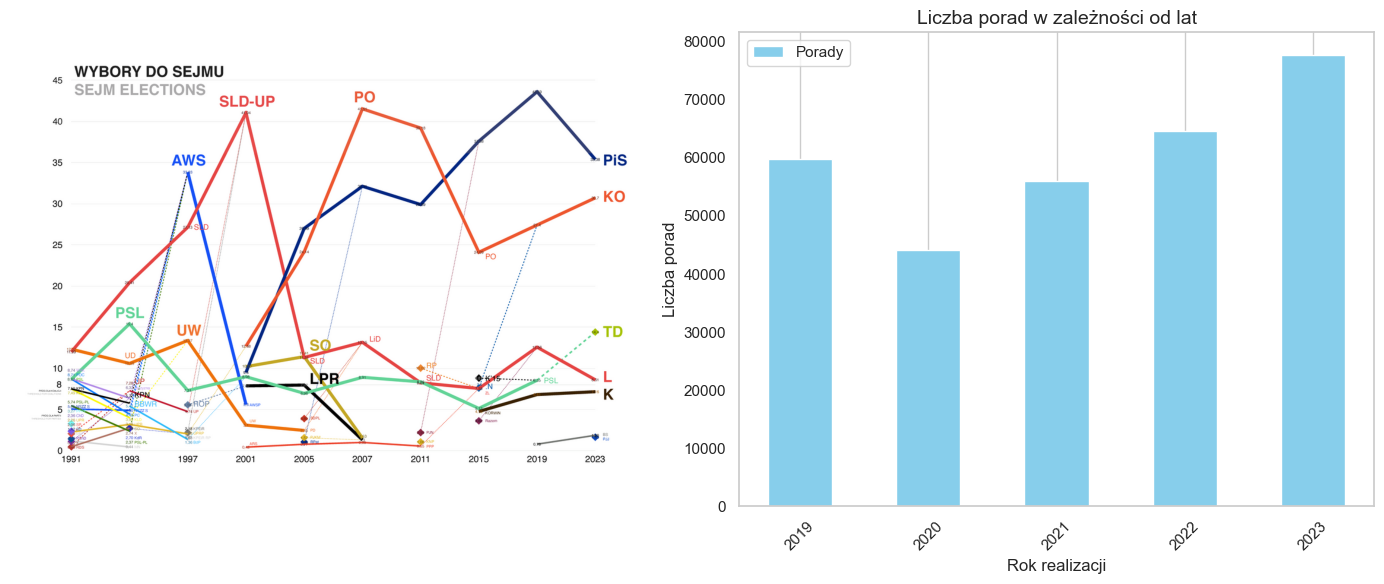

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Wczytanie obrazu
image_path = "Dane wybory 2019-2023/Procentowe_wyniki_wyborów_do_Sejmu.png"
img = mpimg.imread(image_path)

# Wczytanie danych z Excela
file_path = "dane zgrupowane/opieka ambulatoryjna/porady_ambulatoryjne_sprawozdane_z_rozpoznaniem_NTM2019-2023.xlsx"
data = pd.read_excel(file_path)

# Agregacja danych po roku
df_porady_sum = data.groupby("rok realizacji")["liczba"].sum().reset_index()

# Przygotowanie danych do wykresu
lata_porad = sorted(df_porady_sum["rok realizacji"].unique())
x_porad = np.arange(len(lata_porad))
liczba_porad = df_porady_sum["liczba"].tolist()

# Tworzenie figure z dwoma subplotami obok siebie
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pierwszy subplot: Obraz
axes[0].imshow(img)
axes[0].axis("off")  # Ukrycie osi

# Drugi subplot: Wykres słupkowy
axes[1].bar(x_porad, liczba_porad, width=0.5, color='skyblue', label="Porady")
axes[1].set_xlabel("Rok realizacji", fontsize=12)
axes[1].set_ylabel("Liczba porad", fontsize=12)
axes[1].set_title("Liczba porad w zależności od lat", fontsize=14)
axes[1].set_xticks(x_porad)
axes[1].set_xticklabels(lata_porad, rotation=45)
axes[1].legend()
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


# NTM a okres między 1 i 6 falą koronawirusa
źródło: https://koronawirusunas.pl/

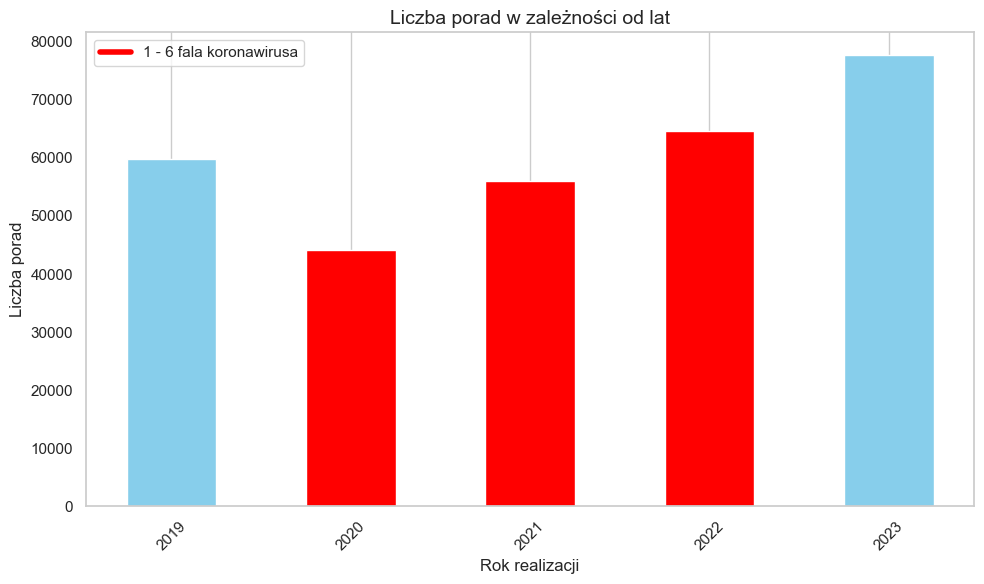

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Importowanie Line2D do niestandardowej legendy

# Wczytanie danych z Excela
file_path = "dane zgrupowane/opieka ambulatoryjna/porady_ambulatoryjne_sprawozdane_z_rozpoznaniem_NTM2019-2023.xlsx"
data = pd.read_excel(file_path)

# Agregacja danych po roku
df_porady_sum = data.groupby("rok realizacji")["liczba"].sum().reset_index()

# Przygotowanie danych do wykresu
lata_porad = sorted(df_porady_sum["rok realizacji"].unique())
x_porad = np.arange(len(lata_porad))
liczba_porad = df_porady_sum["liczba"].tolist()

# Przygotowanie kolorów dla słupków
kolory = ['red' if rok in [2020, 2021, 2022] else 'skyblue' for rok in lata_porad]

# Tworzenie wykresu słupkowego
fig, ax = plt.subplots(figsize=(10, 6))

# Wykres słupkowy
bars = ax.bar(x_porad, liczba_porad, width=0.5, color=kolory)
ax.set_xlabel("Rok realizacji", fontsize=12)
ax.set_ylabel("Liczba porad", fontsize=12)
ax.set_title("Liczba porad w zależności od lat", fontsize=14)
ax.set_xticks(x_porad)
ax.set_xticklabels(lata_porad, rotation=45)

# Dodanie niestandardowej legendy
# Tworzymy legendę tylko dla czerwonego koloru
legend_elements = [Line2D([0], [0], color='red', lw=4, label='1 - 6 fala koronawirusa')]
ax.legend(handles=legend_elements, loc="upper left")

# Włączenie siatki
ax.grid(axis='y')

plt.tight_layout()
plt.show()


# Rozkład NTM na przestrzeni lat ze względu na płeć

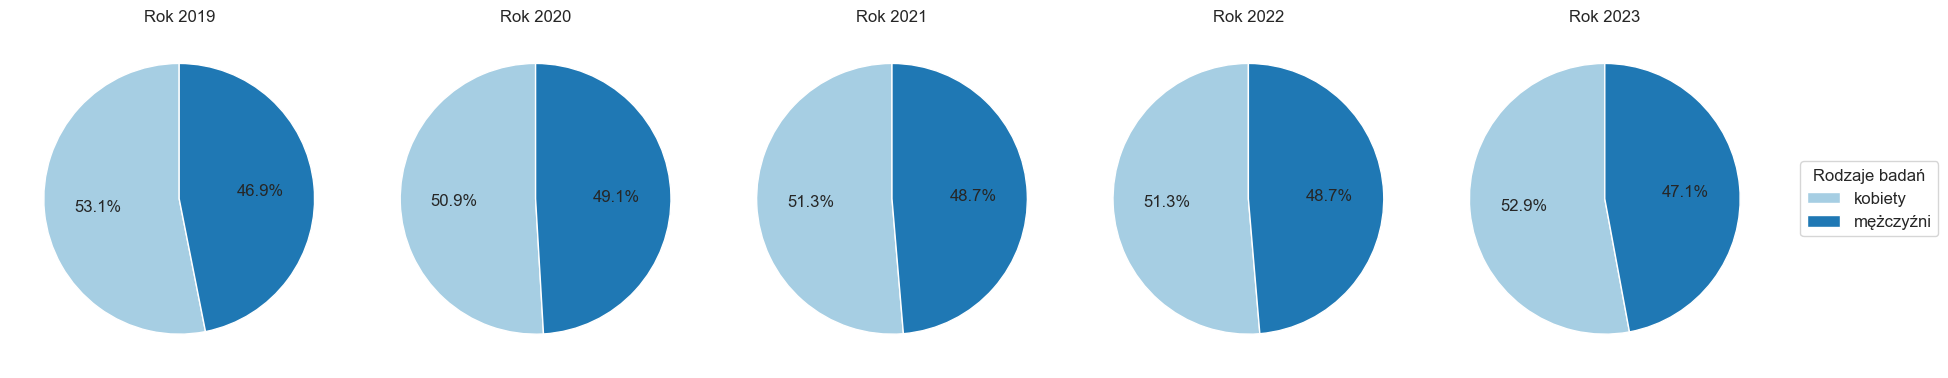

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel
file_path = "dane zgrupowane\\opieka ambulatoryjna\\porady_ambulatoryjne_sprawozdane_z_rozpoznaniem_NTM2019-2023.xlsx"
data = pd.read_excel(file_path)

# Filtrowanie danych dla poradni "urologiczna" i "położniczo-ginekologiczna"
selected_poradnie = ["urologiczna", "położniczo-ginekologiczna"]
filtered_data = data[data["poradnia"].isin(selected_poradnie)]

# Ustawienia wykresów
years = [2019, 2020, 2021, 2022, 2023]
fig, axes = plt.subplots(1, len(years), figsize=(18, 6))  # 5 wykresów w jednym wierszu

# Lista do przechowywania legendy
handles, labels = [], []

# Zmiana nazw poradni na odpowiednie w legendzie
legend_labels = {
    "urologiczna": "mężczyźni",
    "położniczo-ginekologiczna": "kobiety"
}

# Tworzenie wykresów kołowych dla każdego roku
for i, year in enumerate(years):
    # Filtrowanie danych dla danego roku
    yearly_data = filtered_data[filtered_data["rok realizacji"] == year]

    # Obliczanie sumy liczby badań dla każdej poradni w danym roku
    yearly_counts = yearly_data.groupby("poradnia")["liczba"].sum()

    # Tworzenie wykresu kołowego z wyświetleniem tylko procentów
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(
        yearly_counts,
        autopct='%1.1f%%',  # Wyświetlanie tylko procentów
        startangle=90,
        colors=plt.cm.Paired.colors
    )

    # Podpisanie wykresu rokiem
    ax.set_title(f"Rok {year}", fontsize=12)

    # Dodanie elementów legendy (wykorzystamy pierwszy wykres, aby dodać legendę)
    if i == 0:  # Dodajemy legendę tylko do pierwszego wykresu
        for wedge, label in zip(wedges, yearly_counts.index):
            handles.append(wedge)
            # Zamiana nazw poradni na "mężczyźni" i "kobiety"
            labels.append(legend_labels[label])

# Dodanie wspólnej legendy
fig.legend(handles, labels, title="Rodzaje badań", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


# Dofinansowania dla uprzywilejowanej grupy leków na NTM a wybuch wojny na Ukrainie
Porównanie może być przekłamane przez zmianę uprzywilejowanej grupy (od 2022 do weteranów dołączyli seniorzy)

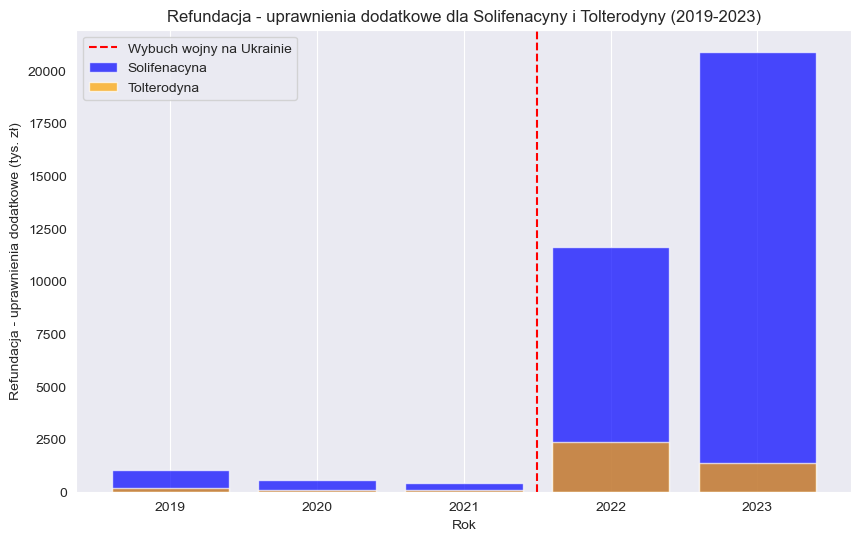

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku Excel
file_path = "dane zgrupowane/LEKI_2019-2023.xlsx"  # Podmień na właściwą ścieżkę do pliku
df = pd.read_excel(file_path)

# Usunięcie białych znaków z nazw kolumn
df.columns = df.columns.str.strip()

# Filtrowanie danych dla Solifenacyny i Tolterodyny
df_filtered = df[df["Substancja czynna"].isin(["Solifenacyna", "Tolterodyna"])]

# Tworzenie wykresu histogramowego
plt.figure(figsize=(10, 6))
substances = ["Solifenacyna", "Tolterodyna"]
colors = ["blue", "orange"]

for substance, color in zip(substances, colors):
    subset = df_filtered[df_filtered["Substancja czynna"] == substance]
    plt.bar(subset["ROK"], subset["w tym refundacja - uprawnienia dodatkowe (tys. zł)"],
            label=substance, alpha=0.7, color=color)

# Dodanie pionowej przerywanej linii między 2021 i 2022
plt.axvline(x=2021.5, color='red', linestyle='--', label='Wybuch wojny na Ukrainie')

# Personalizacja wykresu
plt.xlabel("Rok")
plt.ylabel("Refundacja - uprawnienia dodatkowe (tys. zł)")
plt.title("Refundacja - uprawnienia dodatkowe dla Solifenacyny i Tolterodyny (2019-2023)")
plt.xticks(df_filtered["ROK"].unique())
plt.legend()
plt.grid(axis='y')

# Wyświetlenie wykresu
plt.show()
